In [4]:
%matplotlib inline

In [5]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from datetime import datetime
from config import weather_api_key

In [6]:
# Create a set of random latitude and longitude combos
lats = np.random.uniform(-90 , 90 , size = 2500)
lngs = np.random.uniform(-180 , 180 , size = 2500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [7]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [8]:
# Create a list for holding the cities
cities = []

#Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If the city is unique, then add to the cities list
    if city not in cities:
        cities.append(city)
        
# Print length of city count to confirm enough
len(cities)

904

In [9]:

city_data = []
print("starting to log city_data")
print("-------------------------")

# Create Counters
record_count = 1
set_count = 1

url = "https://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=" + weather_api_key


starting to log city_data
-------------------------


In [10]:
# loop through the cities list
for i, city in enumerate(cities):
    
    # Group the cities in sets of 50 to log the process as we find the weather data
    if (i % 50 == 0 and i >=50):
        set_count += 1
        record_count = 1
        
    # Create endpoint url with each city
    city_url = url + "&q=" + city.replace(" " , "+")
    
    #Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    #Add 1 to the record count
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Country": city_country,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Processing Record 1 of Set 1 | alofi
Processing Record 2 of Set 1 | chuy
Processing Record 3 of Set 1 | bluff
Processing Record 4 of Set 1 | ponta do sol
Processing Record 5 of Set 1 | khonuu
City not found. Skipping...
Processing Record 6 of Set 1 | ancud
Processing Record 7 of Set 1 | galveston
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | severo-kurilsk
Processing Record 10 of Set 1 | inhambane
Processing Record 11 of Set 1 | vite
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | butaritari
Processing Record 16 of Set 1 | henties bay
Processing Record 17 of Set 1 | walvis bay
Processing Record 18 of Set 1 | mataura
Processing Record 19 of Set 1 | san policarpo
Processing Record 20 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 21 of Set 1 | hobart
Processing Record 22 of Set 1 | xingcheng
Processing Record 23 of Set 1 | mitsamio

Processing Record 39 of Set 4 | lagoa vermelha
Processing Record 40 of Set 4 | ulaangom
Processing Record 41 of Set 4 | guerrero negro
Processing Record 42 of Set 4 | pisco
Processing Record 43 of Set 4 | sergeyevka
Processing Record 44 of Set 4 | katsuura
Processing Record 45 of Set 4 | bulolo
Processing Record 46 of Set 4 | amderma
City not found. Skipping...
Processing Record 47 of Set 4 | tazmalt
Processing Record 48 of Set 4 | marquette
Processing Record 49 of Set 4 | fortuna
Processing Record 50 of Set 4 | klaksvik
Processing Record 1 of Set 5 | mercedes
Processing Record 2 of Set 5 | luderitz
Processing Record 3 of Set 5 | krasne
Processing Record 4 of Set 5 | mataram
Processing Record 5 of Set 5 | adrar
Processing Record 6 of Set 5 | cherskiy
Processing Record 7 of Set 5 | nhulunbuy
Processing Record 8 of Set 5 | ribeira brava
Processing Record 9 of Set 5 | jalu
Processing Record 10 of Set 5 | grand gaube
Processing Record 11 of Set 5 | miri
Processing Record 12 of Set 5 | sala

Processing Record 28 of Set 8 | ketchenery
City not found. Skipping...
Processing Record 29 of Set 8 | caceres
Processing Record 30 of Set 8 | yatou
Processing Record 31 of Set 8 | tarauaca
Processing Record 32 of Set 8 | husavik
Processing Record 33 of Set 8 | mys shmidta
City not found. Skipping...
Processing Record 34 of Set 8 | labrea
Processing Record 35 of Set 8 | vestmannaeyjar
Processing Record 36 of Set 8 | rawson
Processing Record 37 of Set 8 | yulara
Processing Record 38 of Set 8 | parabel
Processing Record 39 of Set 8 | pimentel
Processing Record 40 of Set 8 | namibe
Processing Record 41 of Set 8 | sisimiut
Processing Record 42 of Set 8 | dujuma
City not found. Skipping...
Processing Record 43 of Set 8 | bowen
Processing Record 44 of Set 8 | shache
Processing Record 45 of Set 8 | along
Processing Record 46 of Set 8 | maniitsoq
Processing Record 47 of Set 8 | nioki
Processing Record 48 of Set 8 | micheweni
Processing Record 49 of Set 8 | whitecourt
Processing Record 50 of Se

Processing Record 11 of Set 12 | chimbote
Processing Record 12 of Set 12 | ecoporanga
Processing Record 13 of Set 12 | launceston
Processing Record 14 of Set 12 | meadow lake
Processing Record 15 of Set 12 | ostrovnoy
Processing Record 16 of Set 12 | gretna
Processing Record 17 of Set 12 | san francisco
Processing Record 18 of Set 12 | guadalajara
Processing Record 19 of Set 12 | kenora
Processing Record 20 of Set 12 | amuntai
Processing Record 21 of Set 12 | louisbourg
City not found. Skipping...
Processing Record 22 of Set 12 | astana
Processing Record 23 of Set 12 | ariquemes
Processing Record 24 of Set 12 | olinda
Processing Record 25 of Set 12 | ninotsminda
Processing Record 26 of Set 12 | harper
Processing Record 27 of Set 12 | murom
Processing Record 28 of Set 12 | kaduqli
Processing Record 29 of Set 12 | axim
Processing Record 30 of Set 12 | morar
Processing Record 31 of Set 12 | athens
Processing Record 32 of Set 12 | iskateley
Processing Record 33 of Set 12 | phonhong
Process

Processing Record 46 of Set 15 | hengyang
Processing Record 47 of Set 15 | bavleny
Processing Record 48 of Set 15 | erenhot
Processing Record 49 of Set 15 | culpeper
Processing Record 50 of Set 15 | rawannawi
City not found. Skipping...
Processing Record 1 of Set 16 | sao lourenco do sul
Processing Record 2 of Set 16 | churapcha
Processing Record 3 of Set 16 | osakarovka
Processing Record 4 of Set 16 | kamenskoye
City not found. Skipping...
Processing Record 5 of Set 16 | sinop
Processing Record 6 of Set 16 | west wendover
Processing Record 7 of Set 16 | weinan
Processing Record 8 of Set 16 | farah
Processing Record 9 of Set 16 | ponoka
Processing Record 10 of Set 16 | bardiyah
Processing Record 11 of Set 16 | macia
Processing Record 12 of Set 16 | jati
Processing Record 13 of Set 16 | suez
Processing Record 14 of Set 16 | neiafu
Processing Record 15 of Set 16 | oussouye
Processing Record 16 of Set 16 | ixtapa
Processing Record 17 of Set 16 | robertsport
Processing Record 18 of Set 16 

In [11]:
# Add the data to a list in a dictionary then convert it to a DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Alofi,-19.0595,-169.9187,77.00,94,5,4.61,NU,2021-04-01 14:30:50
1,Chuy,-33.6971,-53.4616,71.02,54,48,8.72,UY,2021-04-01 14:30:50
2,Bluff,-46.6000,168.3333,61.29,73,100,31.07,NZ,2021-04-01 14:30:51
3,Ponta Do Sol,32.6667,-17.1000,68.00,73,40,6.91,PT,2021-04-01 14:30:51
4,Ancud,-41.8697,-73.8203,57.00,100,90,3.44,CL,2021-04-01 14:30:52
5,Galveston,29.3669,-94.9669,60.01,41,1,18.41,US,2021-04-01 14:30:52
6,Albany,42.6001,-73.9662,36.00,71,100,1.01,US,2021-04-01 14:29:08
7,Severo-Kurilsk,50.6789,156.1250,32.04,93,98,28.05,RU,2021-04-01 14:30:53
8,Inhambane,-23.8650,35.3833,84.20,51,20,9.22,MZ,2021-04-01 14:30:54
9,Vite,17.2833,74.5500,82.09,43,8,16.44,IN,2021-04-01 14:30:54


In [12]:
new_cols = ['City' , 'Country' , 'Lat' , 'Lng' , 'Max Temp' , 'Humidity' , 'Cloudiness' , 'Wind Speed']
city_data_df = city_data_df[new_cols]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Alofi,NU,2021-04-01 14:30:50,-19.0595,-169.9187,77.00,94,5,4.61
1,Chuy,UY,2021-04-01 14:30:50,-33.6971,-53.4616,71.02,54,48,8.72
2,Bluff,NZ,2021-04-01 14:30:51,-46.6000,168.3333,61.29,73,100,31.07
3,Ponta Do Sol,PT,2021-04-01 14:30:51,32.6667,-17.1000,68.00,73,40,6.91
4,Ancud,CL,2021-04-01 14:30:52,-41.8697,-73.8203,57.00,100,90,3.44
...,...,...,...,...,...,...,...,...,...
820,Buritizeiro,BR,2021-04-01 14:35:24,-17.3511,-44.9622,90.72,40,0,2.64
821,Segou,ML,2021-04-01 14:37:43,13.4317,-6.2157,103.33,6,1,10.89
822,Moskovskiy,RU,2021-04-01 14:37:44,55.5991,37.3550,45.00,100,90,6.71
823,Manthani,IN,2021-04-01 14:37:45,18.6500,79.6667,93.61,15,24,4.05


In [15]:
# Create csv output file (csv)
output_data_file = "weather-data\cities.csv"

#Export the file
city_data_df.to_csv(output_data_file , index_label='City_ID')

In [16]:
# Create variables to plot data
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

In [18]:
#import time module
import time

#get today's date in seconds
today = time.time()
today = time.strftime('%x')
today

'04/01/21'

In [60]:
#Import linregress
from scipy.stats import linregress

#Create function to perform linear regression on the weather data and plot a regression line and equation with the data
def plot_linear_regression(x_values , y_values, title, y_label , text_coordinates):
    
    # Run regression on hemisphere weather data
    (slope, intercept, r_value , p_value , std_err) = linregress(x_values , y_values)
    
    # Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    
    #Get Equuation for the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    #Create a scatter plot and plot the regression line
    plt.scatter(x_values , y_values)
    plt.plot(x_values , regress_values , 'r')
    
    #annotate the text for the line equation
    plt.annotate(line_eq , text_coordinates, fontsize=15, color='red')
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [29]:
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]
souther_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0)]

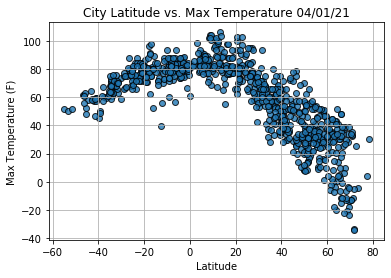

In [20]:
#Build Scatter Plot for lat vs. max temp
plt.scatter(lats , max_temps,
           edgecolor='black' ,
           linewidths=1,
           marker='o',
           alpha=.8,
           label='Cities')

#Graph properties
plt.title(f"City Latitude vs. Max Temperature " + time.strftime('%x'))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

#Save fig
plt.savefig("weather-data/Fig1.png")

plt.show()

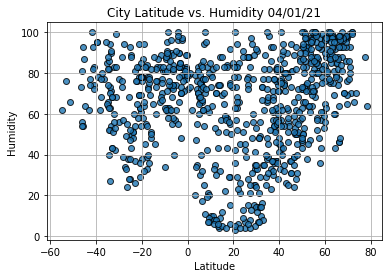

In [22]:
#Build Scatter Plot for lat vs. humidity
plt.scatter(lats , humidity,
           edgecolor='black' ,
           linewidths=1,
           marker='o',
           alpha=.8,
           label='Cities')

#Graph properties
plt.title(f"City Latitude vs. Humidity " + time.strftime('%x'))
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.grid(True)

#Save fig
plt.savefig("weather-data/Fig2.png")

plt.show()

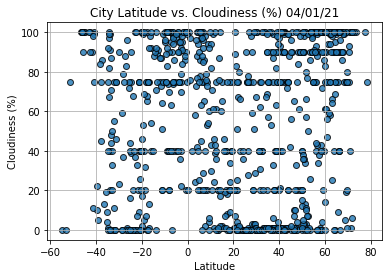

In [24]:
#Build Scatter Plot for lat vs. cloudiness
plt.scatter(lats , cloudiness,
           edgecolor='black' ,
           linewidths=1,
           marker='o',
           alpha=.8,
           label='Cities')

#Graph properties
plt.title(f"City Latitude vs. Cloudiness (%) " + time.strftime('%x'))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

#Save fig
plt.savefig("weather-data/Fig3.png")

plt.show()

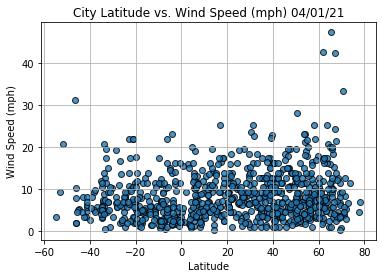

In [25]:
#Build Scatter Plot for lat vs. wind speed
plt.scatter(lats , wind_speed,
           edgecolor='black' ,
           linewidths=1,
           marker='o',
           alpha=.8,
           label='Cities')

#Graph properties
plt.title(f"City Latitude vs. Wind Speed (mph) " + time.strftime('%x'))
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

#Save fig
plt.savefig("weather-data/Fig4.png")

plt.show()

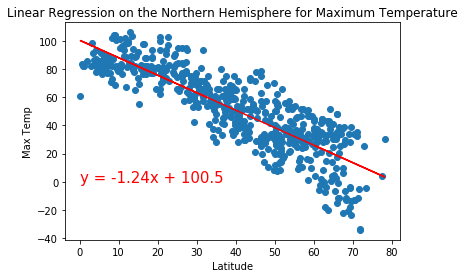

In [61]:
# Linear regression on the northern hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

#Call the function
plot_linear_regression(x_values , y_values , 'Linear Regression on the Northern Hemisphere for Maximum Temperature' , 'Max Temp' , (0,0))

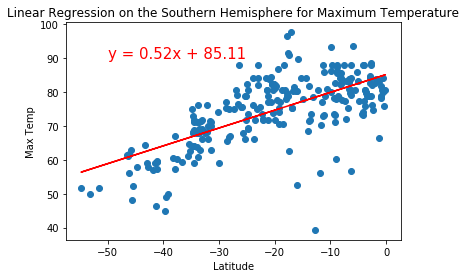

In [62]:
# Linear regression on the south hemisphere
x_values = souther_hemi_df['Lat']
y_values = souther_hemi_df['Max Temp']

#Call the function
plot_linear_regression(x_values , y_values , 'Linear Regression on the Southern Hemisphere for Maximum Temperature' , 'Max Temp' , (-50,90))

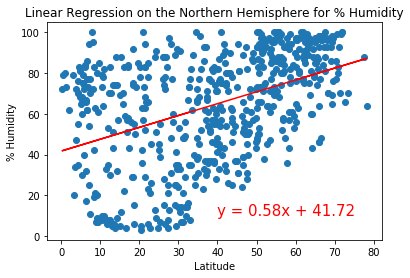

In [63]:
# Linear reression on North Hemi
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

# call function
plot_linear_regression(x_values , y_values, 'Linear Regression on the Northern Hemisphere for % Humidity' , '% Humidity' , (40,10))

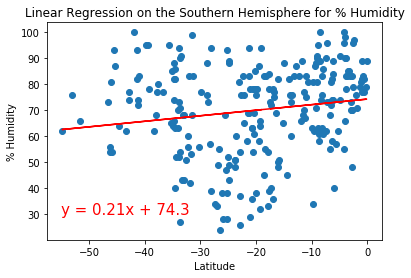

In [64]:
# Linear reression on south Hemi
x_values = souther_hemi_df['Lat']
y_values = souther_hemi_df['Humidity']

# call function
plot_linear_regression(x_values , y_values, 'Linear Regression on the Southern Hemisphere for % Humidity' , '% Humidity' , (-55,30))

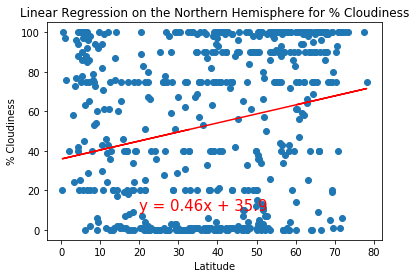

In [65]:
# Linear reression on North Hemi
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

# call function
plot_linear_regression(x_values , y_values, 'Linear Regression on the Northern Hemisphere for % Cloudiness' , '% Cloudiness' , (20,10))

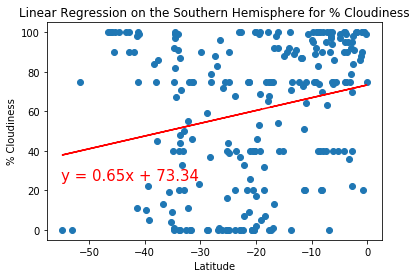

In [66]:
# Linear reression on south Hemi
x_values = souther_hemi_df['Lat']
y_values = souther_hemi_df['Cloudiness']

# call function
plot_linear_regression(x_values , y_values, 'Linear Regression on the Southern Hemisphere for % Cloudiness' , '% Cloudiness' , (-55,25))

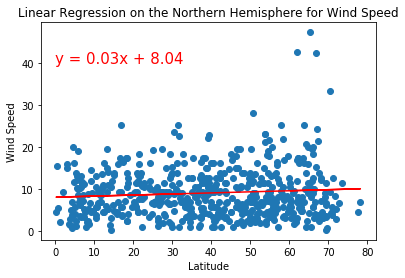

In [67]:
# Linear reression on North Hemi
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

# call function
plot_linear_regression(x_values , y_values, 'Linear Regression on the Northern Hemisphere for Wind Speed' , 'Wind Speed' , (0,40))

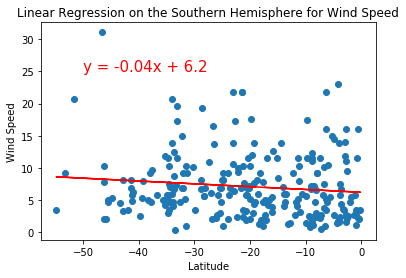

In [69]:
# Linear reression on North Hemi
x_values = souther_hemi_df['Lat']
y_values = souther_hemi_df['Wind Speed']

# call function
plot_linear_regression(x_values , y_values, 'Linear Regression on the Southern Hemisphere for Wind Speed' , 'Wind Speed' , (-50,25))